In [1]:
import pandas as pd
import numpy as np
import xml.etree.ElementTree as ET
from os import listdir
from os.path import isfile
import re
import cv2
import random

from image_handler import get_bb_list, visualize, get_sample
import matplotlib.pyplot as plt

510
[[27, 32, 93, 101], [165, 86, 189, 111], [231, 89, 259, 127], [288, 90, 329, 123]] ['with_mask', 'with_mask', 'with_mask', 'with_mask'] [0.04264045 0.00561798 0.00996255 0.01266854]


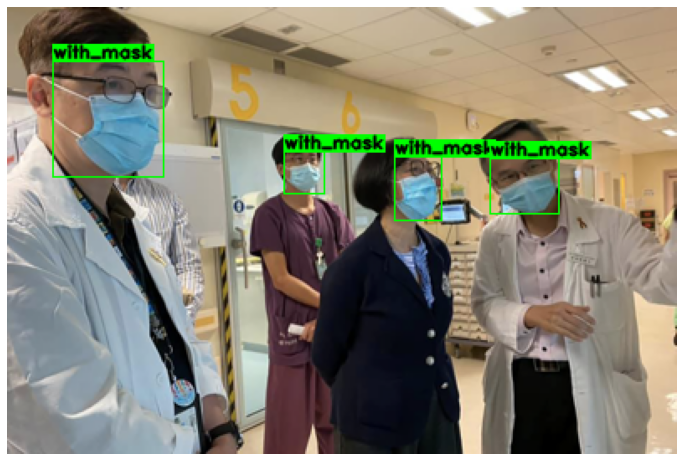

720
[[39, 73, 71, 141], [90, 110, 135, 170], [175, 73, 230, 127], [238, 100, 290, 164], [327, 36, 366, 76]] ['with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask'] [0.02461538 0.03054299 0.03359729 0.03764706 0.01764706]


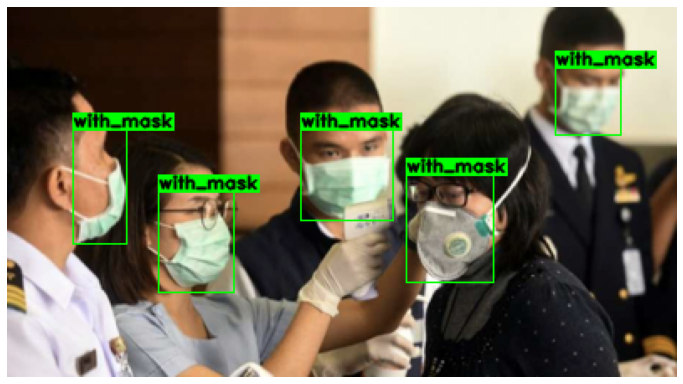

840
[[167, 50, 196, 83], [223, 83, 245, 111]] ['with_mask', 'with_mask'] [0.00896067 0.00576779]


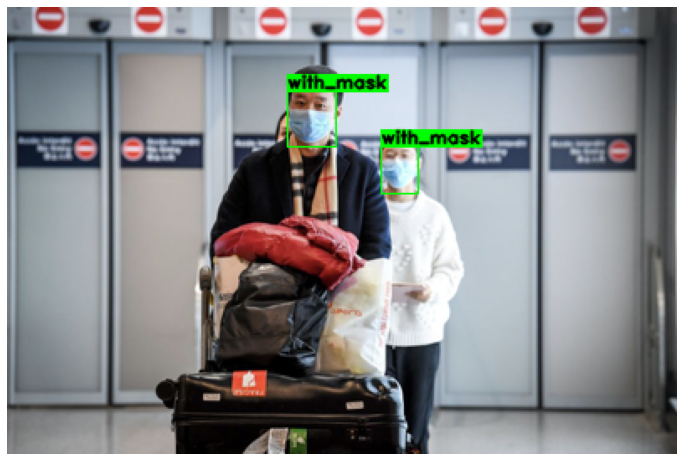

417
[[115, 200, 217, 338]] ['with_mask'] [0.1169103]


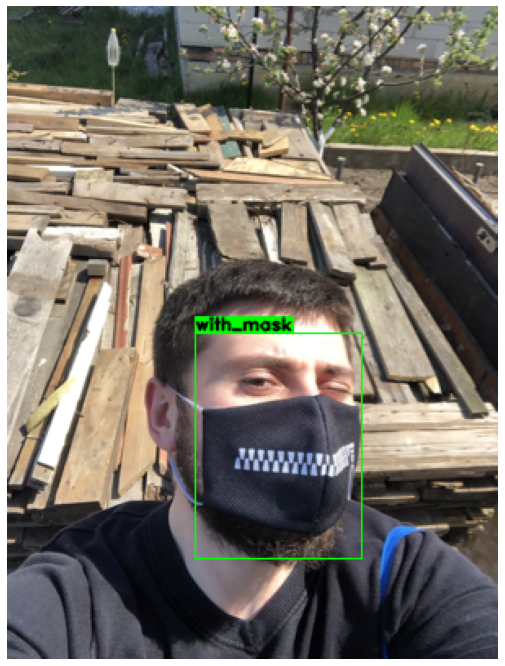

538
[[27, 81, 33, 86], [122, 80, 142, 104], [249, 57, 275, 86]] ['without_mask', 'with_mask', 'with_mask'] [0.00033333 0.00533333 0.00837778]


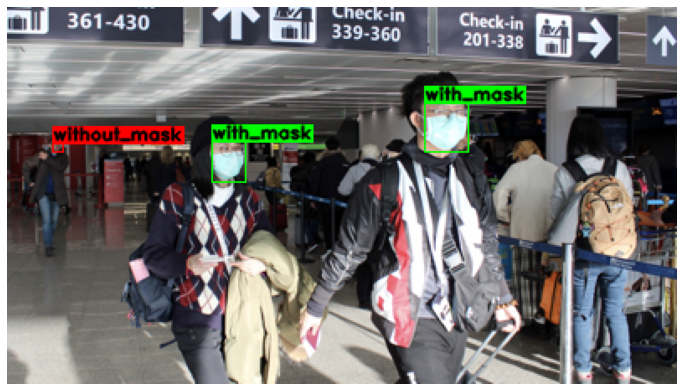

143
[[102, 200, 194, 333]] ['with_mask'] [0.10162791]


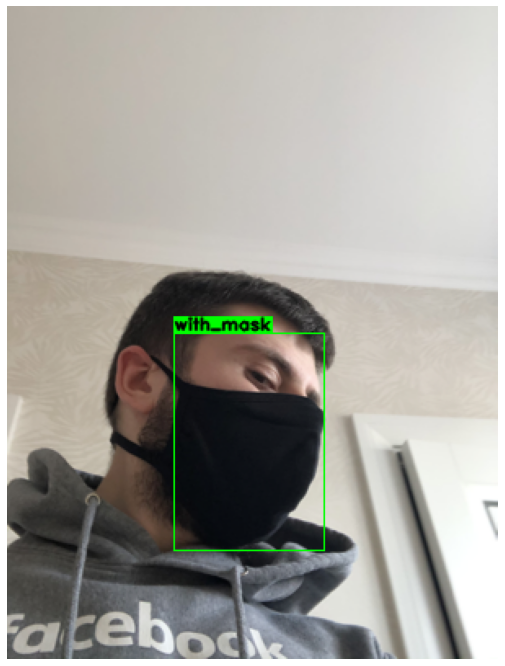

21
[[40, 137, 109, 218], [54, 57, 111, 112], [189, 78, 246, 140], [311, 48, 358, 98], [182, 32, 221, 60]] ['with_mask', 'with_mask', 'with_mask', 'with_mask', 'without_mask'] [0.06155286 0.03452643 0.0389207  0.02588106 0.01202643]


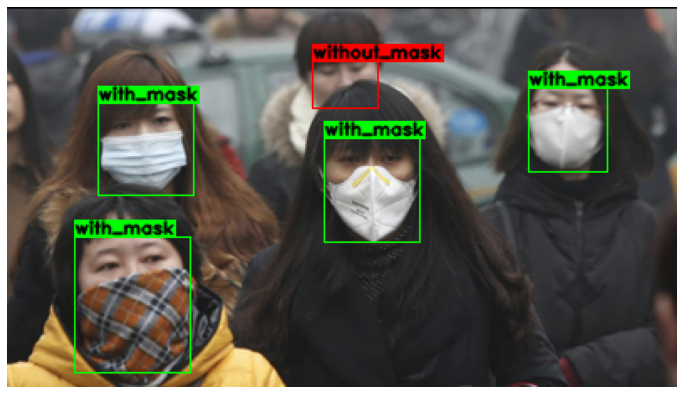

245
[[32, 25, 57, 54], [23, 162, 38, 179], [64, 164, 82, 183], [168, 124, 197, 154], [227, 157, 248, 181], [360, 15, 379, 37], [339, 19, 354, 39]] ['with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask'] [0.00863095 0.00303571 0.00407143 0.01035714 0.006      0.00497619
 0.00357143]


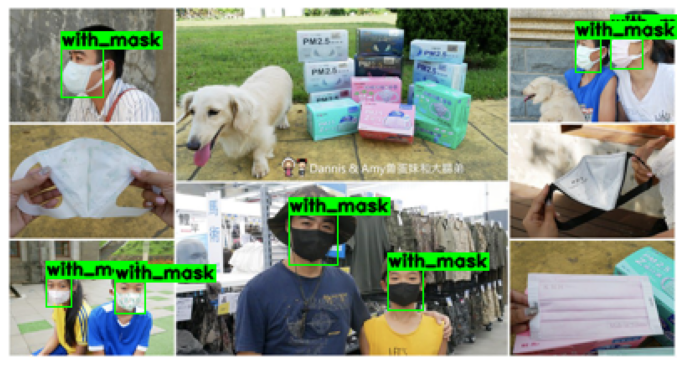

35
[[132, 44, 208, 123], [330, 67, 375, 114]] ['with_mask', 'with_mask'] [0.05886275 0.02073529]


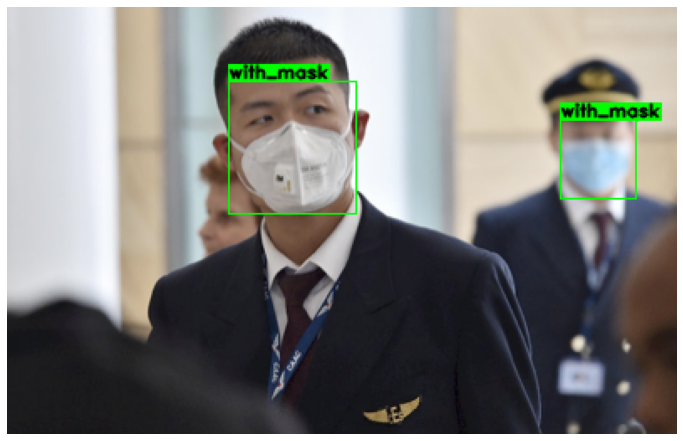

227
[[273, 87, 300, 116], [344, 60, 366, 88], [246, 50, 271, 82], [146, 104, 169, 126], [163, 80, 184, 103], [1, 69, 33, 130], [124, 86, 142, 104], [98, 78, 119, 96], [31, 78, 46, 93], [72, 78, 88, 91], [58, 72, 66, 82], [200, 70, 211, 82]] ['with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask'] [0.00733146 0.00576779 0.00749064 0.00473783 0.00452247 0.01827715
 0.00303371 0.00353933 0.00210674 0.00194757 0.00074906 0.00123596]


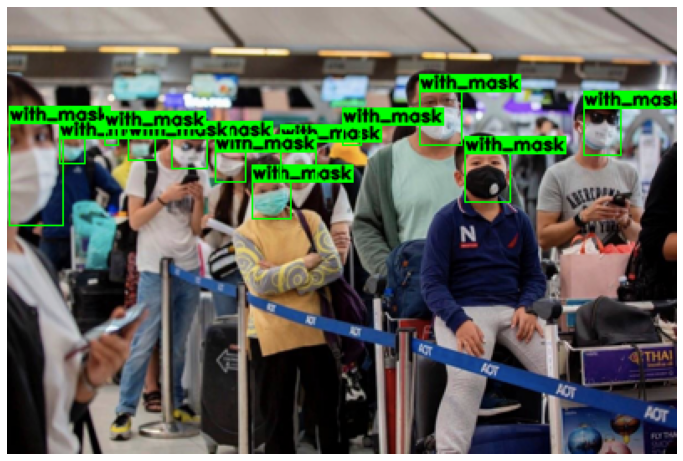

157
[[22, 78, 43, 98], [84, 61, 111, 95], [144, 78, 173, 119], [193, 71, 217, 97], [225, 43, 259, 80], [297, 62, 316, 86], [320, 40, 352, 74], [368, 75, 395, 104]] ['with_mask', 'without_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask'] [0.00466667 0.0102     0.01321111 0.00693333 0.01397778 0.00506667
 0.01208889 0.0087    ]


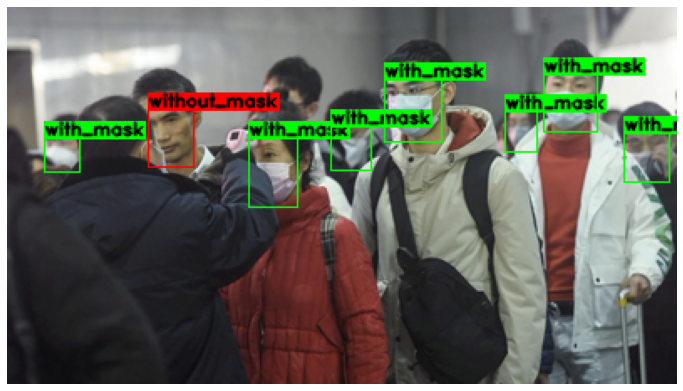

835
[[57, 86, 162, 184]] ['mask_weared_incorrect'] [0.09634831]


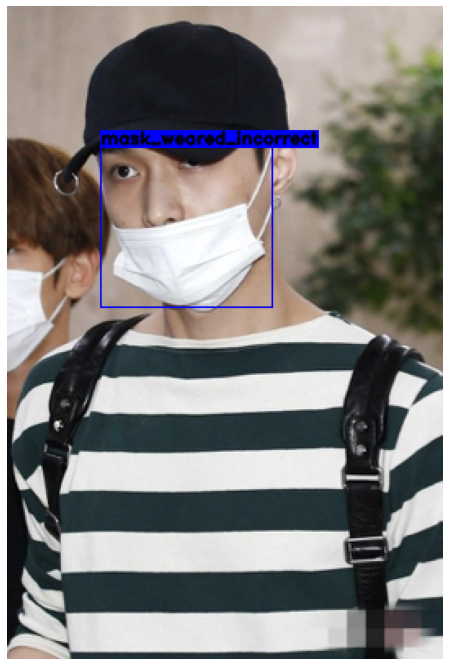

In [4]:
for i in range(12):
    r = random.randint(0,852)
    print(r)
    get_sample(n=r, info=True)

[[3, 65, 96, 163], [146, 28, 249, 140], [287, 180, 343, 225]] ['mask_weared_incorrect', 'with_mask', 'without_mask'] [0.10081858 0.12761062 0.02787611]


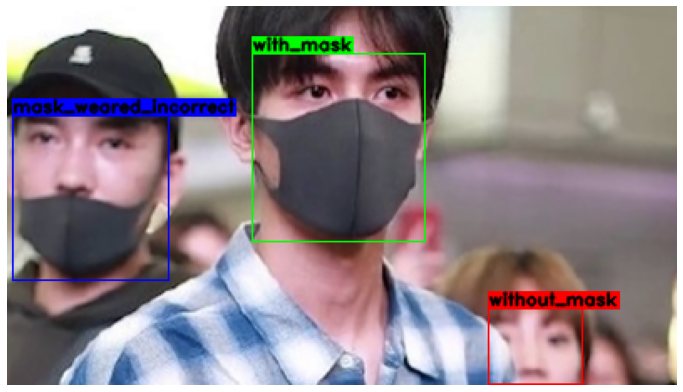

In [16]:
get_sample(307, info=True)

In [5]:
def parse_FMData(img_path, ann_path, targets):
    data = pd.DataFrame(columns=['idx', 'width', 'height', 'without_mask', 'incorrect_weared', 'with_mask'])
    count = 0
    bboxes_area = []
    for file in listdir(ann_path):
        count += 1
        if isfile(ann_path+'/'+file):
            tree = ET.parse(ann_path+'/'+file)
            root = tree.getroot()
            without_mask, incorrect_weared, with_mask= 0, 0, 0
            idx = int(re.sub("[^0-9]", "", file))
            for child in root.findall('size'):
                w = child.find('width').text
                h = child.find('height').text

            img_area = int(w)*int(h)
            for child in root.findall('object'):
                t = child.find('name').text
                if t == targets[0]:
                    without_mask += 1
                elif t == targets[1]:
                    incorrect_weared += 1
                elif t == targets[2]:
                    with_mask += 1
                else:
                    print('Wrong value')

                for bb in child.findall('bndbox'):
                    xmin = int(bb.find('xmin').text)
                    ymin = int(bb.find('ymin').text)
                    xmax = int(bb.find('xmax').text) 
                    ymax = int(bb.find('ymax').text)

                    bb_area = (ymax - ymin) * (xmax - xmin)
                    bboxes_area.append(bb_area/img_area)

            df = {'idx': idx, 'width': w, 'height': h, 'without_mask': without_mask,
                                'incorrect_weared': incorrect_weared, 'with_mask': with_mask}
            data = data.append(df, ignore_index=True)
            
    data.sort_values('idx', inplace=True)
    data.set_index('idx', inplace=True)
    return data,  np.array(bboxes_area)

In [6]:
img_path = 'data/images'
ann_path = 'data/annotations'

# img_path = 'data/train/images'
# ann_path = 'data/train/annotations'

# img_path = 'data/test/images'
# ann_path = 'data/test/annotations'

targets = ['without_mask', 'mask_weared_incorrect', 'with_mask']

data, bboxes_area = parse_FMData(img_path, ann_path, targets)
print(data.head(5))
print(data.shape[0])

    width height without_mask incorrect_weared with_mask
idx                                                     
0     512    366            2                0         1
1     400    156            1                0         8
2     400    290            0                1         3
3     400    271            0                0         9
4     301    400            0                0         1
853


In [5]:
data.max(axis=0)

width               479.0
height              400.0
without_mask         10.0
incorrect_weared      4.0
with_mask            37.0
dtype: float64

In [15]:
data[(data['without_mask'] == data['incorrect_weared']) & (data['without_mask'] == data['with_mask'])]

width height without_mask incorrect_weared with_mask
idx                                                     
307   400    226            1                1         1

In [4]:
print(data['with_mask'].values.argmax())
print(data['without_mask'].values.argmax())

603
240


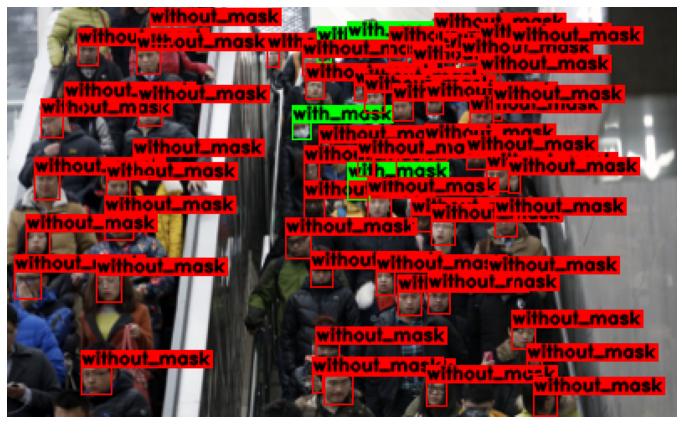

In [38]:
get_sample(240, show_bb=True)

Баланс классов:

В маске: 0.84
Без маски: 0.14
Неправильно надета: 0.03

В маске: 0.78
Без маски: 0.18
Неправильно надета: 0.03


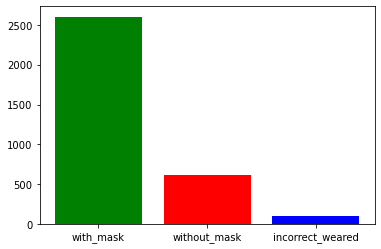

In [53]:
data['total_obj'] = data['without_mask'] + data['incorrect_weared'] + data['with_mask']
total_objects = data['total_obj'].sum()
print('В маске: {:.2f}\nБез маски: {:.2f}\nНеправильно надета: {:.2f}'.format(data['with_mask'].sum()/total_objects, data['without_mask'].sum()/total_objects,
                                                                              data['incorrect_weared'].sum()/total_objects))

index = ['with_mask','without_mask', 'incorrect_weared']
values = [data['with_mask'].sum(), data['without_mask'].sum(), data['incorrect_weared'].sum()]
plt.bar(index, values, color=['g', 'r', 'b'])
plt.show()

Small_size: 0.08
Medium_size 0.56
Big_size: 0.35

Small_size: 0.10
Medium_size 0.58
Big_size: 0.31


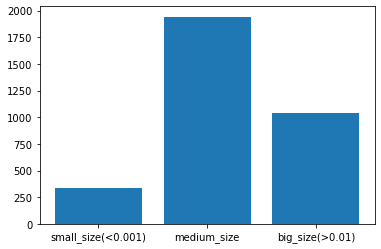

In [54]:
print('Small_size: {:.2f}\nMedium_size {:.2f}\nBig_size: {:.2f}'.format(np.count_nonzero(bboxes_area<0.001)/total_objects,
                                                                       (np.count_nonzero(bboxes_area>=0.001) - np.count_nonzero(bboxes_area>=0.01))/total_objects,
                                                                              np.count_nonzero(bboxes_area>=0.01)/total_objects))

index = ['small_size(<0.001)','medium_size', 'big_size(>0.01)']
values = [np.count_nonzero(bboxes_area<0.001), (np.count_nonzero(bboxes_area>=0.001) - np.count_nonzero(bboxes_area>=0.01)),
          np.count_nonzero(bboxes_area>=0.01)]
plt.bar(index,values)
plt.show()

In [16]:
pd.DataFrame({'bb': bboxes_area}).describe()

bb
count  4072.000000
mean      0.017064
std       0.033748
min       0.000022
25%       0.002247
50%       0.005133
75%       0.013526
max       0.427316